# **Heartbeat sounds**

# Import main libraries

In [2]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf

In [3]:
data_path = "../input/heartbeat-sound/Heartbeat_Sound/"
print(os.listdir(data_path))

['artifact', 'unlabel', 'extrastole', 'extrahls', 'normal', 'murmur']


In [4]:
tarin_data      = data_path 
unlabel_data        = data_path  + "/unlabel/"

normal_data     = tarin_data + '/normal/'
murmur_data     = tarin_data + '/murmur/'
extrastole_data = tarin_data + '/extrastole/'
artifact_data   = tarin_data + '/artifact/'
extrahls_data   = tarin_data + "/extrahls/"

In [5]:
print("Normal files:", len(os.listdir(normal_data))) #length of normal training sounds
print("Murmur files:",len(os.listdir(murmur_data))) #length of murmur training sounds 
print("Extrastole files", len(os.listdir(extrastole_data))) #length of extrastole training sounds 
print("Artifact files:",len(os.listdir(artifact_data))) #length of artifact training sounds 
print("Extrahls files:",len(os.listdir(extrahls_data))) #length of extrahls training sounds 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

Normal files: 351
Murmur files: 129
Extrastole files 46
Artifact files: 40
Extrahls files: 19
TOTAL TRAIN SOUNDS: 585


In [6]:
print("Test sounds: ", len(os.listdir(unlabel_data)))

Test sounds:  247


# EDA and Visualization

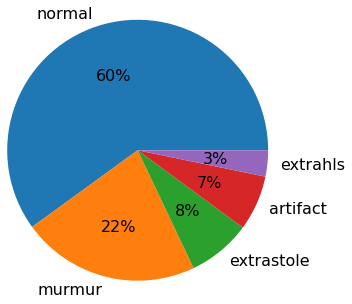

In [7]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

##### The figure shows imbalanced data so we need to fix it later 


## *Visualizing random sample*

In [8]:
# Listen to rondom audio from specific class
def random_sound (audio_class):
    random_sound = np.random.randint(0,len(os.listdir(audio_class)))
    sound = os.listdir(audio_class)[random_sound]
    sound = audio_class+sound
    sound,sample_rate = librosa.load(sound)
    return ipd.Audio(sound,rate=sample_rate),sound

In [9]:
# show waveform of audio from dataset
# X axis, represents time.
# Y-axis measures displacement of air molecules.
# This is where amplitude comes in. It measures how much a molecule is displaced from its resting position.
def show_audio_waveform(audio_sample):
    plt.figure(figsize=(20,5))
    librosa.display.waveshow(audio_sample, sr = 22050)
    plt.title("Sound")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def radix2_fft(audio_sample, sample_rate=22050):
    # Calculate the FFT using radix-2 algorithm
    N = len(audio_sample)
    fft_result = np.fft.fft(audio_sample)
    frequency = np.fft.fftfreq(N, d=1/sample_rate)

    # Keep only positive frequencies and their magnitudes
    positive_freq = frequency[:N//2]
    magnitude = np.abs(fft_result[:N//2])

    return positive_freq, magnitude

In [11]:
def show_audio_spectrum(audio_sample, sample_rate=22050):
    frequency, magnitude = radix2_fft(audio_sample, sample_rate)

    # Display the spectrum
    plt.figure(figsize=(12, 8))
    plt.plot(frequency, magnitude)
    plt.title("Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

In [12]:
def show_spectrogram (audio_sample):
    # STFT -> spectrogram
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    sample_rate = 22050

    # calculate duration hop length and window in seconds
    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))

    # perform stft
    stft_normal = librosa.stft(audio_sample, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft_normal)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # display spectrogram
    plt.figure(figsize=(15,10))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    #plt.set_cmap("YlOrBr")
    plt.title("Spectrogram")


In [13]:
# MFCCs
# extract 52 MFCCs
def show_mfcc_features(audio_sample):
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    sample_rate = 22050

    MFCCs = librosa.feature.mfcc(y = audio_sample, n_fft=n_fft, hop_length=hop_length, n_mfcc=52)

    # display MFCCs
    plt.figure(figsize=(15,10))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")
    plt.show()

## *1. Normal sound*

In [14]:
normal_audio, normal_sample  = random_sound(normal_data)
normal_audio

### Waveform

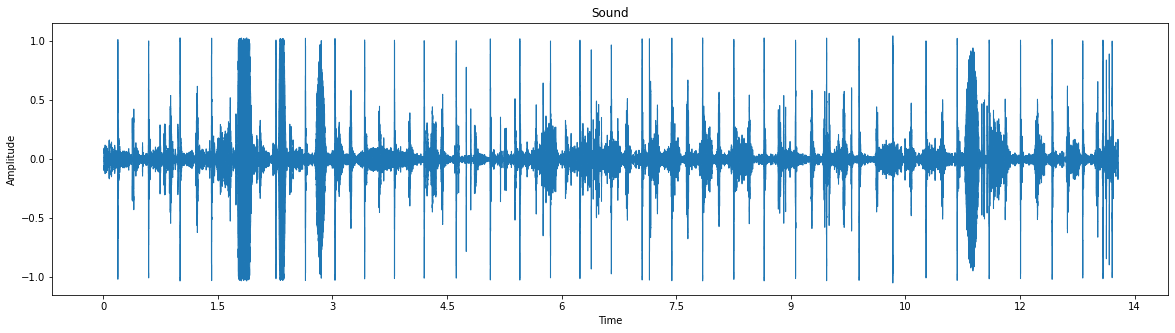

In [15]:
show_audio_waveform(normal_sample)

### Spectrum

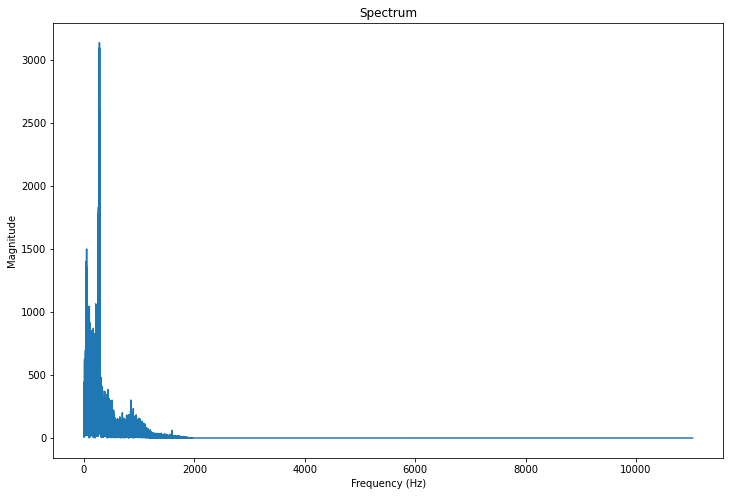

In [16]:
show_audio_spectrum(normal_sample)

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


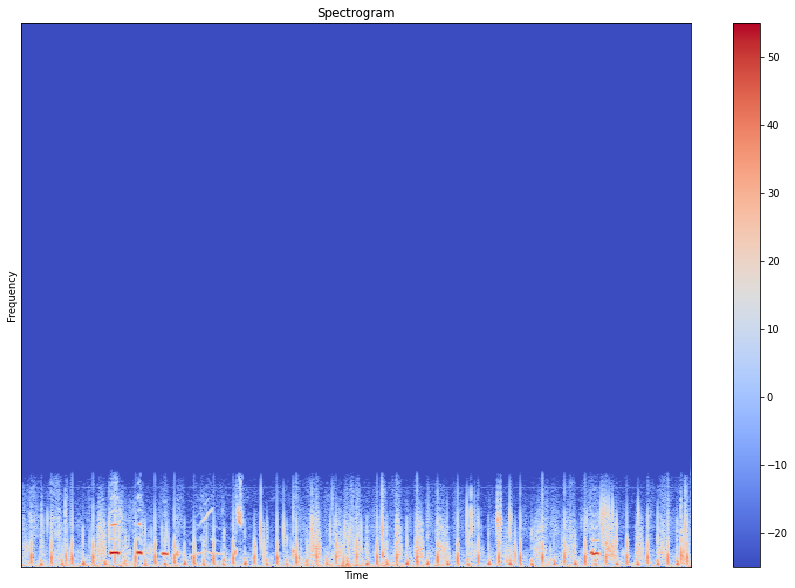

In [17]:
show_spectrogram(normal_sample)

### MFCCs

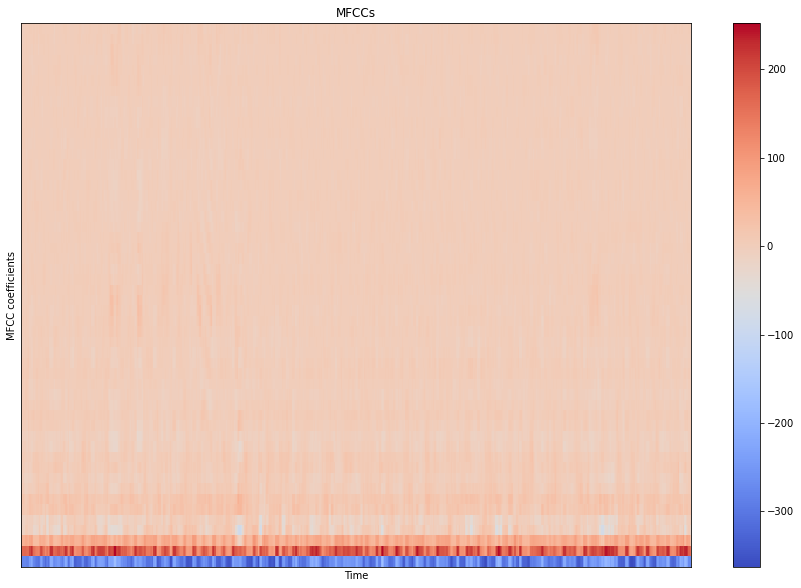

In [18]:
show_mfcc_features(normal_sample)

## *2. Murmur sound*

In [19]:
murmur_audio, murmur_sample  = random_sound(murmur_data)
murmur_audio

### Waveform

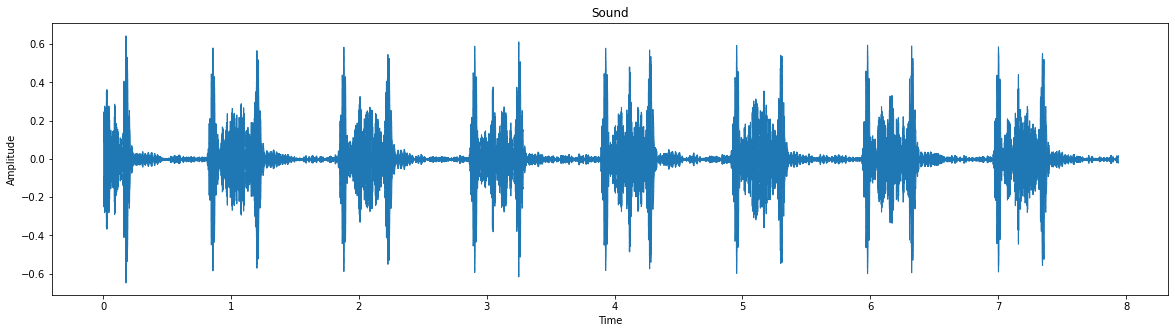

In [20]:
show_audio_waveform(murmur_sample)

### Spectrum

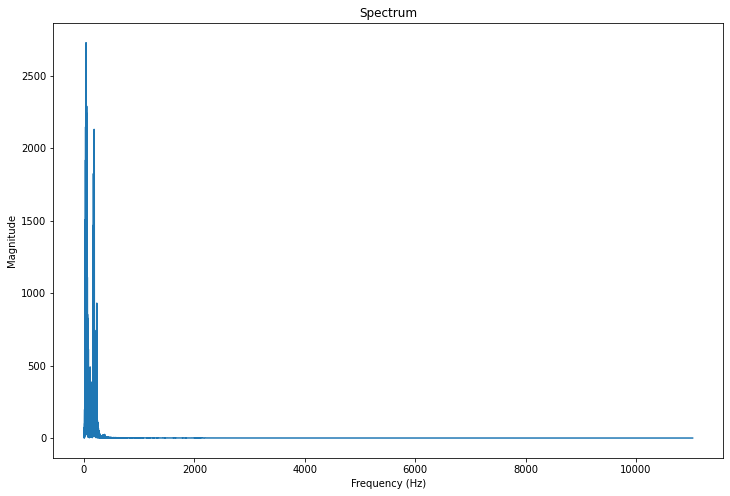

In [21]:
show_audio_spectrum(murmur_sample)

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


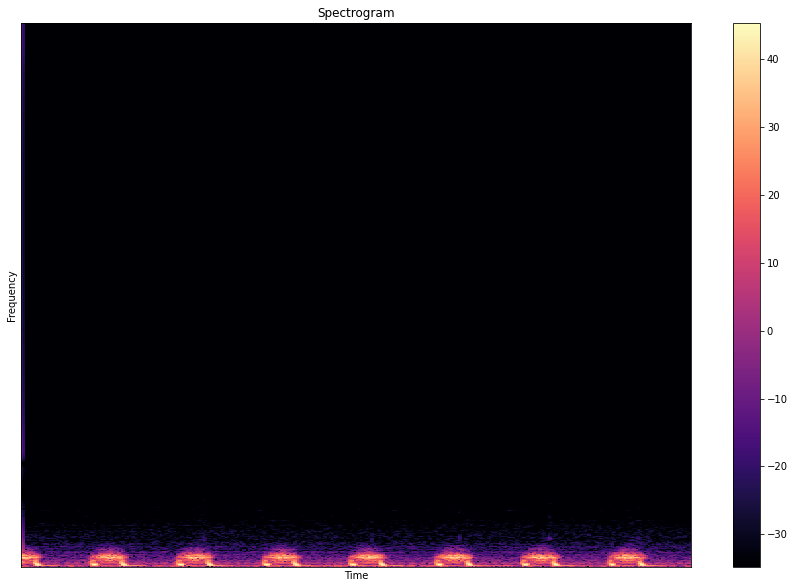

In [22]:
show_spectrogram(murmur_sample)

### MFCCs

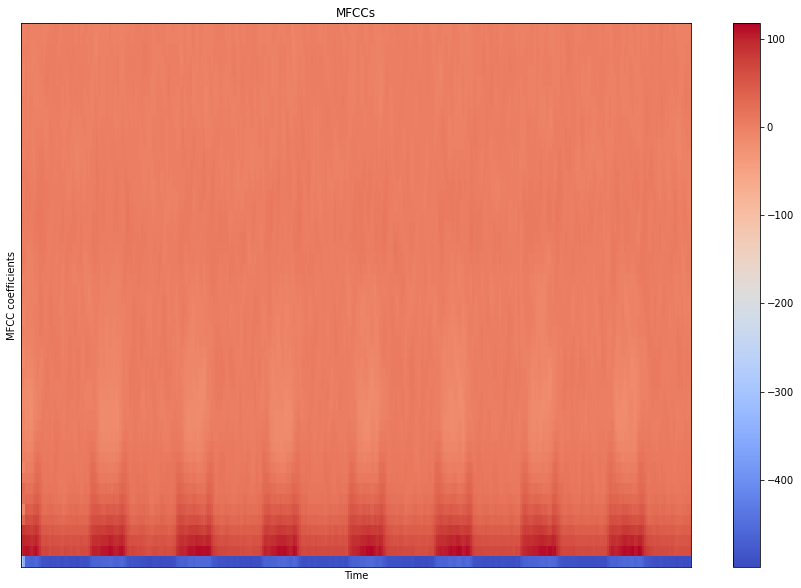

In [23]:
show_mfcc_features(murmur_sample)

## *3. Extrastole sound*

In [24]:
extrastole_audio, extrastole_sample  = random_sound(extrastole_data)
extrastole_audio

### Waveform

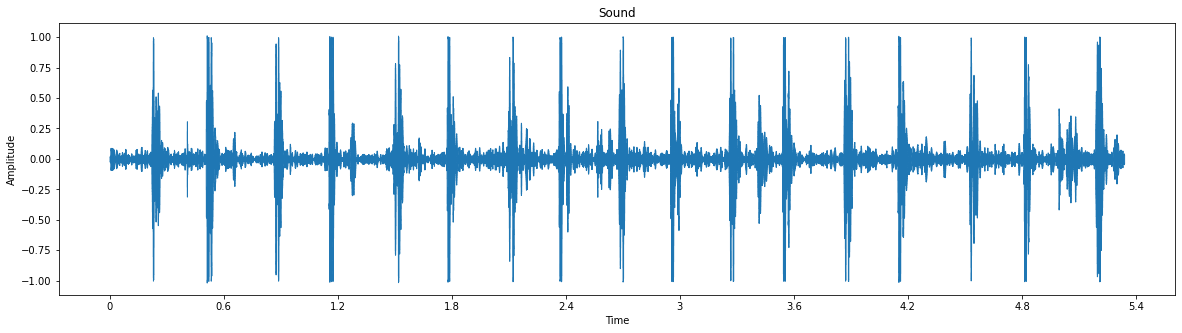

In [25]:
show_audio_waveform(extrastole_sample)

### Spectrum

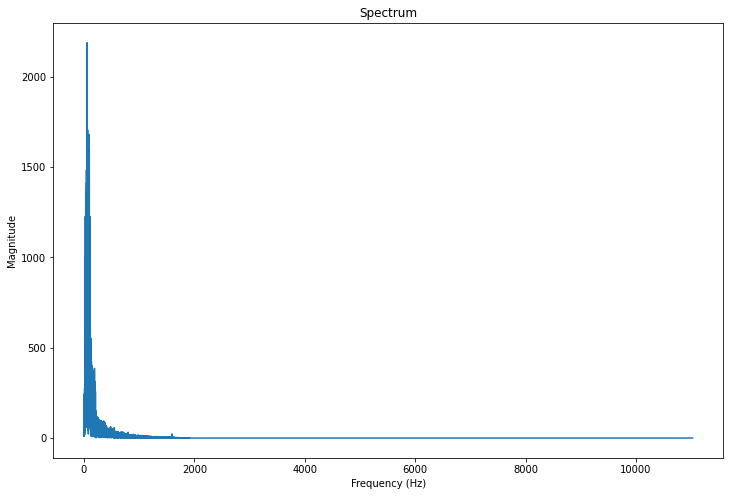

In [26]:
show_audio_spectrum(extrastole_sample)

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


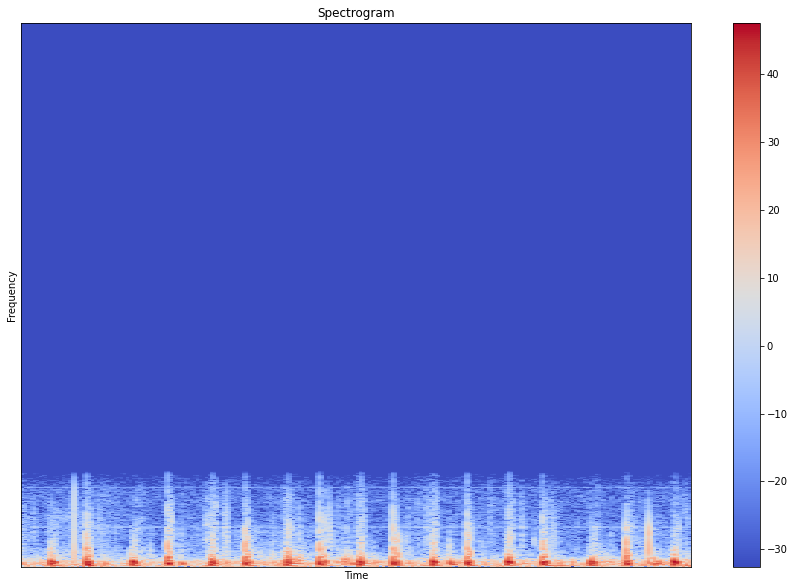

In [27]:
show_spectrogram(extrastole_sample)

### MFCCs

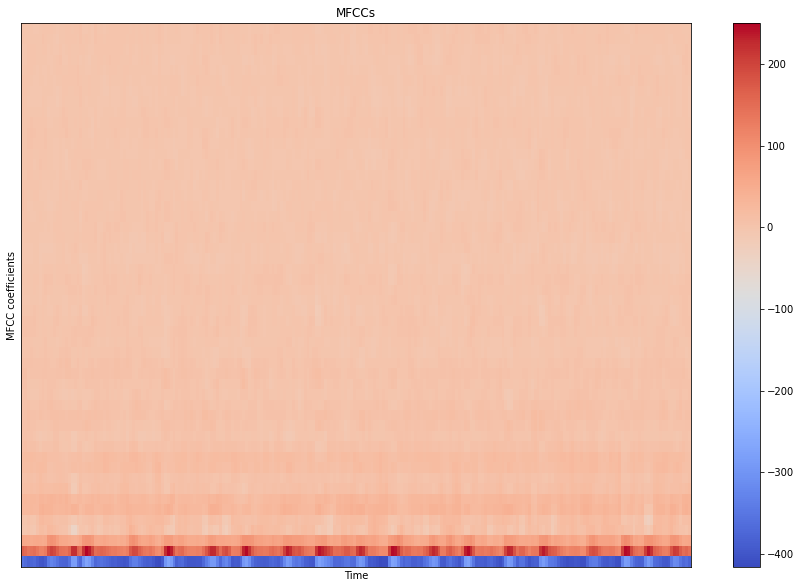

In [28]:
show_mfcc_features(extrastole_sample)

## *4. Artifact sound*

In [29]:
artifact_audio, artifact_sample  = random_sound(artifact_data)
artifact_audio

### Waveform

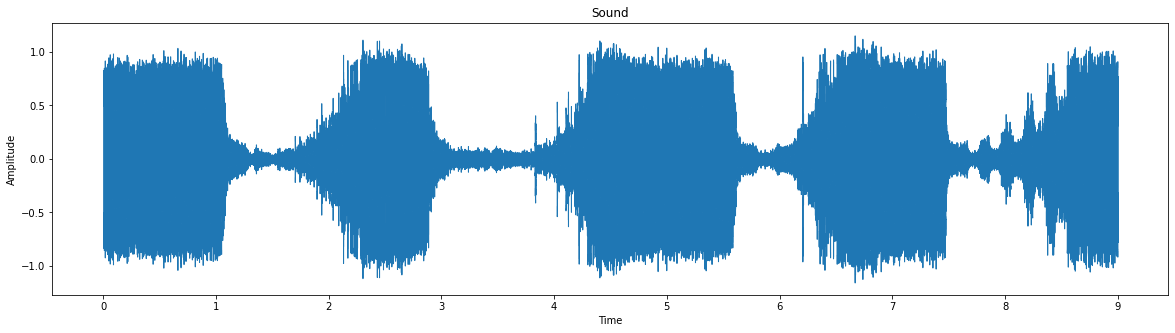

In [30]:
show_audio_waveform(artifact_sample)

### Spectrum

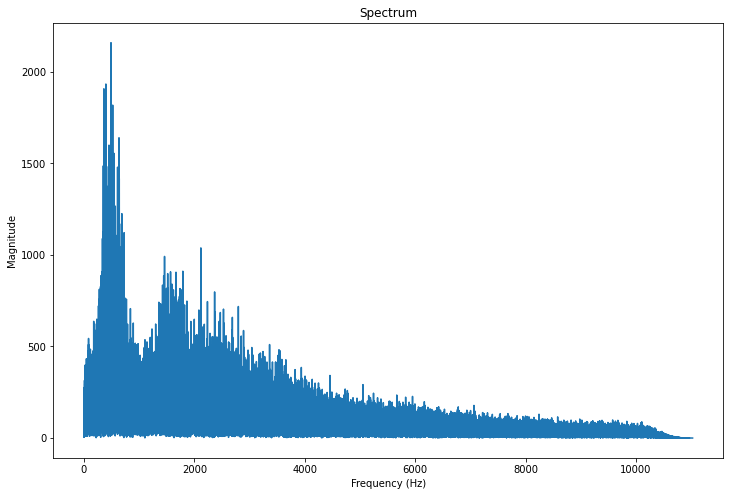

In [31]:
show_audio_spectrum(artifact_sample)

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


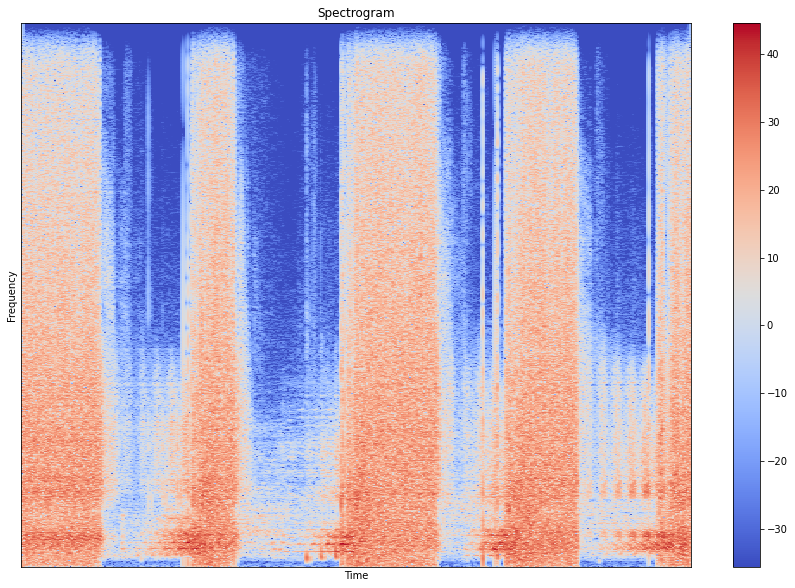

In [32]:
show_spectrogram(artifact_sample)

### MFCCs

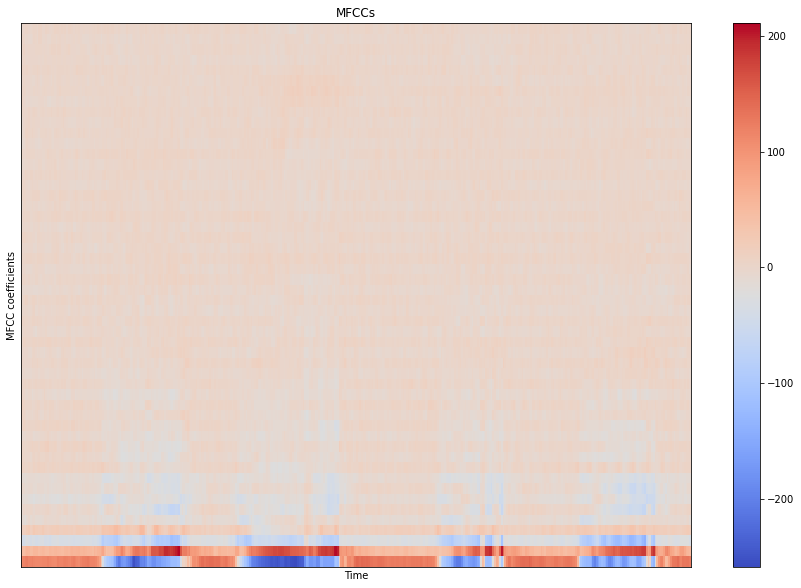

In [33]:
show_mfcc_features(artifact_sample)

## *5. Extrahls sound*

In [34]:
extrahls_audio, extrahls_sample  = random_sound(extrahls_data)
extrahls_audio

### Waveform

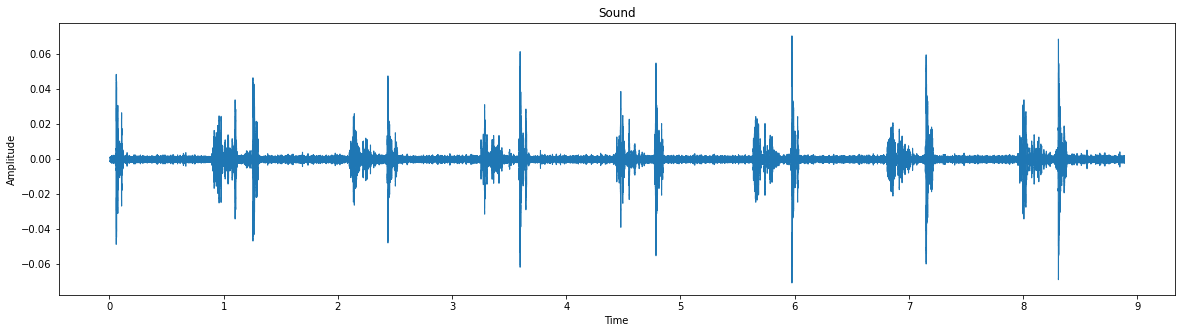

In [35]:
show_audio_waveform(extrahls_sample)

### Spectrum

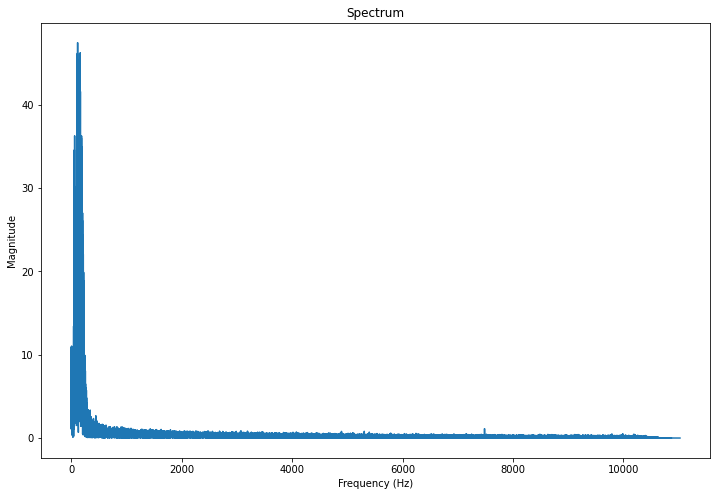

In [36]:
show_audio_spectrum(extrahls_sample)

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


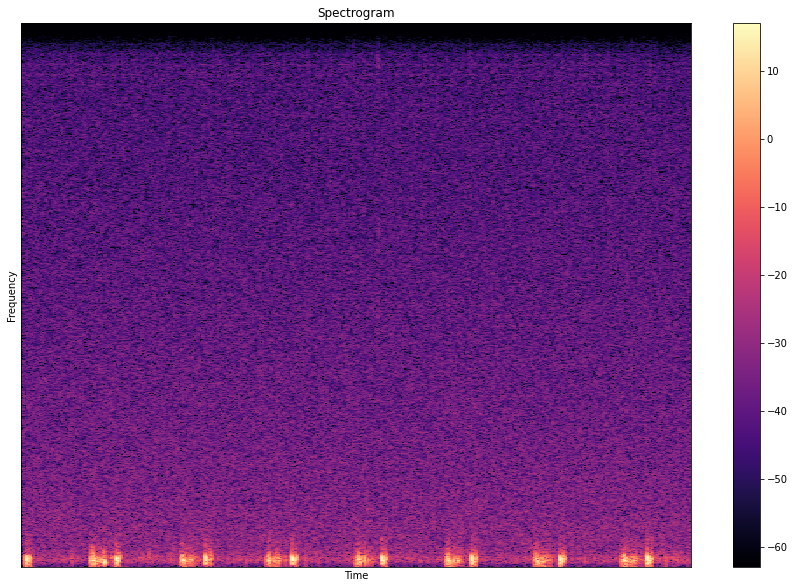

In [37]:
show_spectrogram(extrahls_sample)

### MFCCs

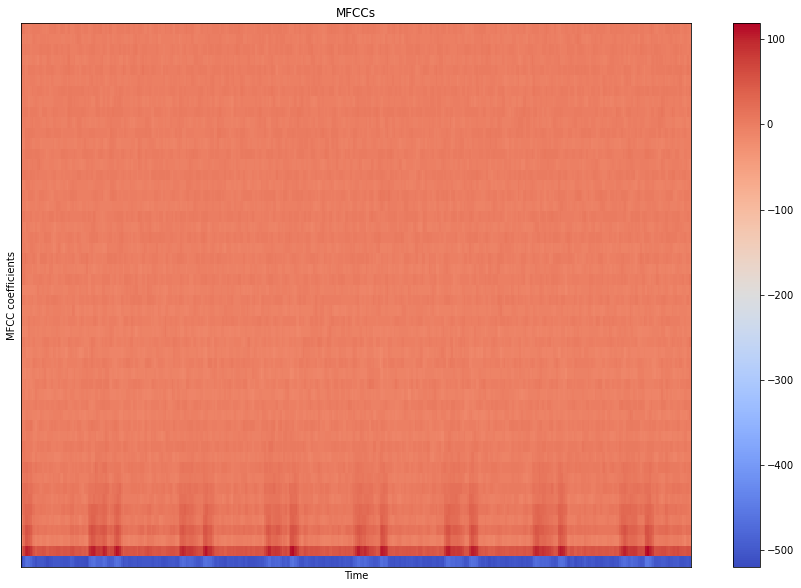

In [38]:
show_mfcc_features(extrahls_sample)

# Loading Data

In [39]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

# Preprocessing : 

## *Encoding*

In [61]:
# simple encoding of categories, convert to only 3 types:
# Normal (Include extrahls and extrastole)
# Murmur
# Artifact
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [62]:
# 22 KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]


extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [2 for items in extrastole_files]

print ("Loading Done")

load file  ../input/heartbeat-sound/Heartbeat_Sound//artifact/artifact__201106131834.wav
fixing audio lenght : artifact__201106131834.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//artifact/artifact__201106101955.wav
fixing audio lenght : artifact__201106101955.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//artifact/artifact__201106220340.wav
fixing audio lenght : artifact__201106220340.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//artifact/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//artifact/artifact__201106040722.wav
fixing audio lenght : artifact__201106040722.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//artifact/artifact__201106070949.wav
fixing audio lenght : artifact__201106070949.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//artifact/artifact__201106221254.wav
fixing audio lenght : artifact__201106221254.wav
load file  ../input/heartbeat-soun

In [46]:
# unlabel_datala files
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("Loading of unlabel data done")


load file  ../input/heartbeat-sound/Heartbeat_Sound//unlabel/Bunlabelledtest__231_1308748318393_C.wav
fixing audio lenght : Bunlabelledtest__231_1308748318393_C.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//unlabel/Bunlabelledtest__157_1306937583792_C.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//unlabel/Bunlabelledtest__152_1306779561195_C.wav
fixing audio lenght : Bunlabelledtest__152_1306779561195_C.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//unlabel/Bunlabelledtest__235_1308749032454_C1.wav
fixing audio lenght : Bunlabelledtest__235_1308749032454_C1.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//unlabel/Bunlabelledtest__107_1305654946865_B.wav
fixing audio lenght : Bunlabelledtest__107_1305654946865_B.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//unlabel/Bunlabelledtest__148_1306768801551_D.wav
fixing audio lenght : Bunlabelledtest__148_1306768801551_D.wav
load file  ../input/heartbeat-sound/Heartbeat_Sound//unlabel/Bunlabelle

## *concatenation*

In [47]:
#combine set-a and set-b 
x_data = np.concatenate((artifact_sounds, normal_sounds,extrahls_sounds,murmur_sounds,extrastole_sounds))

y_data = np.concatenate((artifact_labels, normal_labels,extrahls_labels,murmur_labels,extrastole_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [48]:
x_data.shape

(585, 25, 1)

In [49]:
len(x_data)

585

## *train_test_validation split*


In [50]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

### Correct imbalnced data using class weight

In [63]:
TRAIN_IMG_COUNT = 578
COUNT_0 = 40  #artifact
COUNT_1 = 129 #murmur
COUNT_2 = 409 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

{0: 4.816666666666666, 1: 1.4935400516795865, 2: 0.4710676446617767}

# CNN Model

In [65]:
#CNN Model

import os
import fnmatch
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the heart sound data and preprocess it...

# Reshape data for CNN model
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_val_cnn = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Create a CNN model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(25, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_cnn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['acc'])

model_cnn.summary()

# Train the CNN model
history_cnn = model_cnn.fit(x_train_cnn, y_train, 
                            batch_size=3, 
                            epochs=50,
                            class_weight=class_weight,
                            validation_data=(x_val_cnn, y_val))

# Plot training history
losses_cnn = pd.DataFrame(history_cnn.history)
losses_cnn[['loss', 'val_loss']].plot()
losses_cnn[['acc', 'val_acc']].plot()

# Evaluate the CNN model
scores_cnn = model_cnn.evaluate(x_test_cnn, y_test)
print("CNN Model evaluation accuracy:", round(scores_cnn[1] * 100), "%")

# Save the CNN model
model_cnn.save('heart_sounds_cnn.h5')

# Classification report
target_names = ["artifact", "murmur", "normal"]
y_pred_cnn = np.argmax(model_cnn.predict(x_test_cnn, batch_size=32), axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred_cnn, target_names=target_names))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 23, 64)            256       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 9, 128)            24704     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 5) and (None, 3) are incompatible


In [ ]:
# make a prediction
y_pred = model_cnn.predict(x_test, batch_size=5)
#check scores
scores = model_cnn.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

# LSTM Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 25, 256)           133120    
_________________________________________________________________
dense_12 (Dense)             (None, 25, 128)           32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 128)           0         
_________________________________________________________________
dense_13 (Dense)             (None, 25, 128)           16512     
_________________________________________________________________
dense_14 (Dense)             (None, 25, 64)            8256      
_________________________________________________________________
dense_15 (Dense)             (None, 25, 64)            4160      
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

In [68]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [69]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [70]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=10,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

Epoch 1/10


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 5) and (None, 3) are incompatible


In [71]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

In [ ]:
losses[['acc','val_acc']].plot()

In [ ]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

# HYBRID


In [ ]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
# Hybrid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report

model1 = Sequential()

# Bidirectional LSTM layer
model1.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape=(25, 1)))

# Convolutional layer
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))

# Dense layers
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))

# Flatten layer
model1.add(Flatten())

# Output layer
model1.add(Dense(3, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model1.summary()

# Rest of your training code
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)
history = model1.fit(x_train, y_train, 
                    batch_size=3, 
                    epochs=30,
                    class_weight=class_weight,
                    callbacks=[weight_saver, annealer],
                    validation_data=(x_val, y_val))

# Rest of your code for evaluation and predictions


In [ ]:
losses = pd.DataFrame(model1.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
losses[['acc','val_acc']].plot()

In [ ]:
model1.save('heart_sounds.h5')

In [ ]:
# make a prediction
y_pred = model1.predict(x_test, batch_size=5)
#check scores
scores = model1.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

In [ ]:
# Assuming x_test contains the test data for prediction
# Replace x_test with your actual test data

# Make predictions on the test data
predictions = model1.predict(x_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Map predicted classes to labels
class_mapping = {0: 'Label0', 1: 'Label1', 2: 'Label2'}
predicted_labels = [class_mapping[pred_class] for pred_class in predicted_classes]

# Print the predicted labels
print("Predicted Labels:")
print(predicted_labels)

# Rest of your evaluation code can go here
# For example, you might want to compare the predictions with the true labels (y_test)

# Example: Printing classification report
# Assuming y_test contains the true labels
# Replace y_test with your actual true labels
true_labels = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes))


In [ ]:
from tensorflow.keras.models import load_model
import librosa
import numpy as np

# Load the trained model
model = load_model('heart_sounds.h1')

# Function to preprocess a single audio file
def preprocess_audio(file_path, duration=10, sr=22050):
    input_length = sr * duration
    process_file = []
    X, sr = librosa.load(file_path, sr=sr, duration=duration) 
    dur = librosa.get_duration(y=X, sr=sr)
    
    # Pad audio file if its duration is less than the specified duration
    if round(dur) < duration:
        y = librosa.util.fix_length(X, input_length)
    
    # Extract normalized MFCC feature from data
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T, axis=0)
    
    feature = np.array(mfccs).reshape([-1, 1])
    process_file.append(feature)
    process_file_array = np.asarray(process_file)
    
    return process_file_array

# Example: Provide the path to an audio file for prediction
audio_file_path = '/kaggle/input/heartbeat-sound/Heartbeat_Sound/normal/normal__103_1305031931979_B.wav'
processed_audio = preprocess_audio(audio_file_path)

# Make a prediction
prediction = model.predict(processed_audio)

# Convert prediction to class label
predicted_class = np.argmax(prediction)

# Map the predicted class to normal or abnormal based on your label mapping
class_mapping = {0: 'abnormal', 1: 'abnormal', 2: 'normal'}
predicted_label = class_mapping[predicted_class]

# Print the result
print(f'The prediction for the provided audio file is: {predicted_label}')


In [ ]:
# Function to process a directory of audio files and print results to console
def process_directory_and_print(directory_path):
    print(f"{'S.NO': <6}{'File Name': <20}Prediction")
    print("-" * 40)

    for i, filename in enumerate(os.listdir(directory_path)):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Preprocess the audio file
            processed_audio = preprocess_audio(file_path)

            # Make a prediction
            prediction = model.predict(processed_audio)

            # Convert prediction to class label
            predicted_class = np.argmax(prediction)

            # Map the predicted class to normal or abnormal based on your label mapping
            class_mapping = {0: 'abnormal', 1: 'abnormal', 2: 'normal'}
            predicted_label = class_mapping[predicted_class]

            # Print the results to the console
            print(f"{i + 1:<6}{filename:<20}{predicted_label}")

# Example: Provide the path to a directory for prediction
audio_directory_path = '/kaggle/input/heartbeat-sound/Heartbeat_Sound/murmur'
process_directory_and_print(audio_directory_path)


In [ ]:
# Function to process a directory of audio files and print results to console
def process_directory_and_print(directory_path):
    print(f"{'S.NO': <6}{'File Name': <20}Prediction")
    print("-" * 40)

    for i, filename in enumerate(os.listdir(directory_path)):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)

            # Preprocess the audio file
            processed_audio = preprocess_audio(file_path)

            # Make a prediction
            prediction = model.predict(processed_audio)

            # Convert prediction to class label
            predicted_class = np.argmax(prediction)

            # Map the predicted class to normal or abnormal based on your label mapping
            class_mapping = {0: 'abnormal', 1: 'abnormal', 2: 'normal'}
            predicted_label = class_mapping[predicted_class]

            # Print the results to the console
            print(f"{i + 1:<6}{filename:<20}{predicted_label}")

# Example: Provide the path to a directory for prediction
audio_directory_path = '/kaggle/input/testing'
process_directory_and_print(audio_directory_path)
